In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler
import pandas as pd
import tensorflow as tf
import numpy as np

# Import our input dataset
df = pd.read_csv('../neural-network/pitcher_salaries_cleaned.csv')
df.head()

,Year,Full Name,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,League,Team,Games Started
0,1990,AbbottJim,23,185000,4.51,246,106,105,16,10,14,635,925,0,200,75,AL,CAL,33
1,1990,AbbottPaul,23,100000,5.97,37,23,25,0,0,5,104,162,0,185,75,AL,MIN,7
2,1990,AldredScott,22,100000,3.77,13,6,7,0,1,2,43,63,0,195,76,AL,DET,3
3,1990,AndersonAllan,26,300000,4.53,214,95,82,20,7,18,566,797,0,178,71,AL,MIN,31
4,1990,AppierKevin,23,100000,2.76,179,57,127,13,12,8,557,784,1,180,74,AL,KCA,24


In [2]:
# create log transformed column for salary
df['sal-log']=np.log10(df['Salary'])
df

,Year,Full Name,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,League,Team,Games Started,sal-log
0,1990,AbbottJim,23,185000,4.51,246,106,105,16,10,14,635,925,0,200,75,AL,CAL,33,5.267172
1,1990,AbbottPaul,23,100000,5.97,37,23,25,0,0,5,104,162,0,185,75,AL,MIN,7,5.000000
2,1990,AldredScott,22,100000,3.77,13,6,7,0,1,2,43,63,0,195,76,AL,DET,3,5.000000
3,1990,AndersonAllan,26,300000,4.53,214,95,82,20,7,18,566,797,0,178,71,AL,MIN,31,5.477121
4,1990,AppierKevin,23,100000,2.76,179,57,127,13,12,8,557,784,1,180,74,AL,KCA,24,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4932,2016,WorleyVance,29,2600000,3.53,84,34,56,11,2,2,260,365,13,240,74,AL,BAL,4,6.414973
4933,2016,WrightMike,26,510500,5.79,81,48,50,12,3,4,224,328,5,240,78,AL,BAL,12,5.707996
4934,2016,WrightSteven,32,514500,3.33,138,58,127,12,13,6,470,656,0,215,74,AL,BOS,24,5.711385
4935,2016,YoungChris,37,4250000,6.19,104,61,94,28,3,9,266,406,7,255,82,AL,KCA,13,6.628389


### Reduce down to top features
---

In [3]:
df= df.drop(["Full Name","Team","League","Age","Earned Runs","Home Runs","Wins","Losses","Weight","Height","Year","Salary"],1)
df.head()

C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,ERA,Hits,Strike Outs,Outs Pitched,Batters Faced by Pitcher,Games Finished,Games Started,sal-log
0,4.51,246,105,635,925,0,33,5.267172
1,5.97,37,25,104,162,0,7,5.000000
2,3.77,13,7,43,63,0,3,5.000000
3,4.53,214,82,566,797,0,31,5.477121
4,2.76,179,127,557,784,1,24,5.000000


In [4]:
df= df.drop(["Games Finished","Games Started","Hits"],1)
df.head()

C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,ERA,Strike Outs,Outs Pitched,Batters Faced by Pitcher,sal-log
0,4.51,105,635,925,5.267172
1,5.97,25,104,162,5.000000
2,3.77,7,43,63,5.000000
3,4.53,82,566,797,5.477121
4,2.76,127,557,784,5.000000


In [5]:
df= df.drop(["Batters Faced by Pitcher"],1)
df.head()

C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,ERA,Strike Outs,Outs Pitched,sal-log
0,4.51,105,635,5.267172
1,5.97,25,104,5.000000
2,3.77,7,43,5.000000
3,4.53,82,566,5.477121
4,2.76,127,557,5.000000


### Split Features/Target & Training/Testing Sets
---
Split into features and target
- **y variable**: Our target variable, `Salary`
- **X variable**: Our features; just drop `Salary` and `Full Name`

In [6]:
# Split our preprocessed data into our features and target arrays
y = df["sal-log"].values
X = df.drop(["sal-log"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


### Build and Instantiate `StandardScaler` object, then standardize numerical features
---

In [7]:
# Create a StandardScaler instance
scaler = MinMaxScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# see if data scaled properly
scaled_data=pd.DataFrame(X_train_scaled)
scaled_data.head()

,0,1,2
0,0.242754,0.140884,0.295970
1,0.144928,0.502762,0.882872
2,0.273913,0.193370,0.584383
3,0.765217,0.035912,0.025189
4,0.255072,0.287293,0.581864


In [ ]:
# see if data scaled properly
scaled_y=pd.DataFrame(y_train_scaled)
scaled_y.head()

### Build Neural Net Framework
--- 


In [28]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               400       
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 30)                1530      
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 7,011
Trainable params: 7,011
Non-trainable params: 0
_________________________________________________________________


### Compile the Model
---

In [29]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

### Train the model
---

In [ ]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=200)

In [31]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

39/39 - 0s - loss: 1.2880 - mse: 1.2880 - 75ms/epoch - 2ms/step
Loss: 1.288001537322998, Accuracy: 1.288001537322998


<AxesSubplot:>

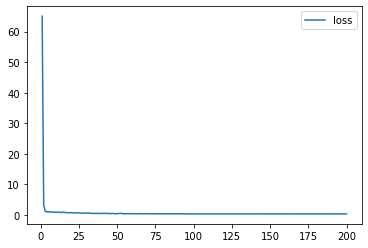

In [32]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

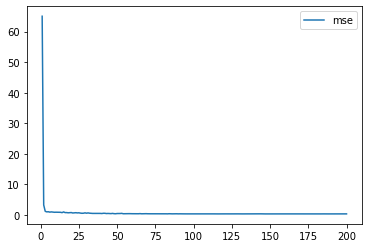

In [33]:
# Plot the accuracy
history_df.plot(y="mse")